In [1]:
import pandas as pd
df = pd.read_csv('mushroom_cleaned.csv')
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [2]:
# 수치형 변수 3개 + 범주형 변수 1개로 예측하는 모델
x_num = ['cap-diameter', 'stem-height', 'stem-width']
x_cat = ['cap-shape']
x = x_num + x_cat
y = 'class'

In [3]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df[x_cat])
x_cat_ohe = ohe.transform(df[x_cat])
df_cat = pd.DataFrame(x_cat_ohe.toarray(), columns=ohe.get_feature_names_out())
df_cat.describe()

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,0.097585,0.031868,0.227519,0.051448,0.031461,0.127491,0.432627
std,0.296755,0.175651,0.419234,0.220912,0.174562,0.333526,0.495445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df_num = df[x_num]
df_x = pd.concat([df_num, df_cat], axis=1)
df_x

,cap-diameter,stem-height,stem-width,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6
0,1372,3.807467,1545,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1461,3.807467,1557,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1371,3.612496,1566,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1261,3.787572,1566,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1305,3.711971,1464,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
54030,73,0.887740,569,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54031,82,1.186164,490,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54032,82,0.915593,584,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54033,79,1.034963,491,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(df_x, df[y], test_size=0.2, random_state=42)
print(x_train_all.shape, x_test.shape)

(43228, 10) (10807, 10)


In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, test_size=0.3, random_state=42, stratify=y_train_all)
print(x_train.shape, x_valid.shape)

(30259, 10) (12969, 10)


In [7]:
# Train / Validation / Test 타겟 분포
print(y_train.sum() / len(y_train))
print(y_valid.sum() / len(y_valid))
print(y_test.sum() / len(y_test))

0.5500512244290955
0.5500038553473668
0.5457573794762653


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(x_train, y_train)
y_valid_rf = clf_rf.predict(x_valid)
p_valid_rf = clf_rf.predict_proba(x_valid)[:, 1]
print('Random Forest Accuracy =', accuracy_score(y_valid, y_valid_rf))
print('Random Forest AUC =', roc_auc_score(y_valid, p_valid_rf))

Random Forest Accuracy = 0.8497956665895597
Random Forest AUC = 0.9331362921681817


In [9]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(random_state=42)
clf_xgb.fit(x_train, y_train)
y_valid_xgb = clf_xgb.predict(x_valid)
p_valid_xgb = clf_xgb.predict_proba(x_valid)[:, 1]
print('XGBoost Accuracy =', accuracy_score(y_valid, y_valid_xgb))
print('XGBoost AUC =', roc_auc_score(y_valid, p_valid_xgb))

XGBoost Accuracy = 0.8476366720641529
XGBoost AUC = 0.9351769647047814


In [10]:
import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier(random_state=42)
clf_lgb.fit(x_train, y_train)
y_valid_lgb = clf_lgb.predict(x_valid)
p_valid_lgb = clf_lgb.predict_proba(x_valid)[:, 1]
print('LightGBM Accuracy =', accuracy_score(y_valid, y_valid_lgb))
print('LightGBM AUC =', roc_auc_score(y_valid, p_valid_lgb))

[LightGBM] [Info] Number of positive: 16644, number of negative: 13615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 30259, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550051 -> initscore=0.200878
[LightGBM] [Info] Start training from score 0.200878
LightGBM Accuracy = 0.8403886190145732
LightGBM AUC = 0.9266357810241463


In [11]:
# Validation AUC를 최대화하는 XGBoost 선택할 경우 최종 성능
clf_final = XGBClassifier(random_state=42)
clf_final.fit(x_train_all, y_train_all)
y_test_final = clf_final.predict(x_test)
p_test_final = clf_final.predict_proba(x_test)[:, 1]
print('Test Accuracy =', accuracy_score(y_test, y_test_final))
print('Test AUC =', roc_auc_score(y_test, p_test_final))

Test Accuracy = 0.8503747571018784
Test AUC = 0.9362072320505841


In [12]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, p_valid_rf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_valid, p_valid_xgb)
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_valid, p_valid_lgb)

<Axes: >

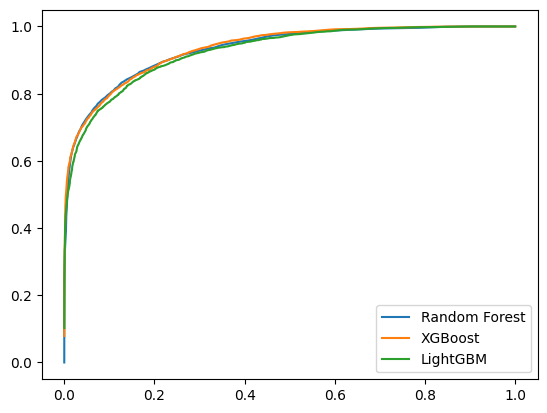

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=fpr_rf, y=tpr_rf, label='Random Forest')
sns.lineplot(x=fpr_xgb, y=tpr_xgb, label='XGBoost')
sns.lineplot(x=fpr_lgb, y=tpr_lgb, label='LightGBM')

In [27]:
rf_points = pd.DataFrame(zip(fpr_rf, tpr_rf, thresholds_rf), columns=['fpr', 'tpr', 'thresholds'])
rf_points['model'] = 'Random Forest'
xgb_points = pd.DataFrame(zip(fpr_xgb, tpr_xgb, thresholds_xgb), columns=['fpr', 'tpr', 'thresholds'])
xgb_points['model'] = 'XGBoost'
lgb_points = pd.DataFrame(zip(fpr_lgb, tpr_lgb, thresholds_lgb), columns=['fpr', 'tpr', 'thresholds'])
lgb_points['model'] = 'LightGBM'
roc_points = pd.concat([rf_points, xgb_points, lgb_points])
roc_points

,fpr,tpr,thresholds,model
0,0.000000,0.000000,2.000000,Random Forest
1,0.000171,0.240572,1.000000,Random Forest
2,0.001542,0.336324,0.990000,Random Forest
3,0.003770,0.394084,0.980000,Random Forest
4,0.004455,0.435581,0.970000,Random Forest
...,...,...,...,...
4553,0.998458,1.000000,0.003096,LightGBM
4554,0.998629,1.000000,0.002925,LightGBM
4555,0.999143,1.000000,0.002889,LightGBM
4556,0.999315,1.000000,0.002879,LightGBM


In [28]:
from scipy.spatial import ConvexHull
hull = ConvexHull(roc_points.loc[:, ['fpr', 'tpr']])
rocch_points = roc_points.iloc[hull.vertices]
rocch_points.head(10)

,fpr,tpr,thresholds,model
0,0.000000,0.000000,2.000000,Random Forest
99,1.000000,1.000000,0.000000,Random Forest
4401,0.895476,1.000000,0.056011,LightGBM
3256,0.847327,0.999720,0.017998,XGBoost
3238,0.817341,0.999299,0.026234,XGBoost
3217,0.777587,0.998458,0.036446,XGBoost
3159,0.686600,0.995934,0.065182,XGBoost
3085,0.599726,0.991588,0.098387,XGBoost
3069,0.588931,0.990747,0.103588,XGBoost
2962,0.501028,0.983037,0.152228,XGBoost


In [29]:
len(rocch_points)

55

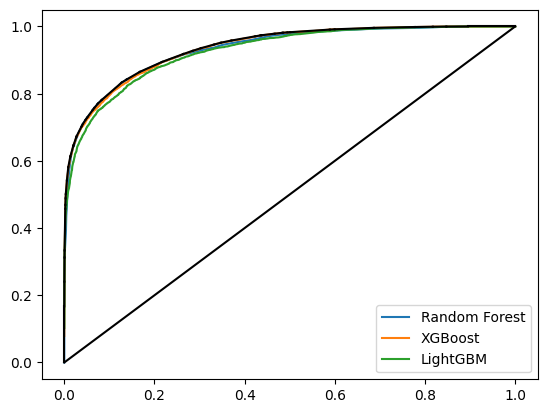

In [30]:
# Plot the ROC convex hull
fig, ax = plt.subplots()
sns.lineplot(x=fpr_rf, y=tpr_rf, label='Random Forest', ax=ax)
sns.lineplot(x=fpr_xgb, y=tpr_xgb, label='XGBoost', ax=ax)
sns.lineplot(x=fpr_lgb, y=tpr_lgb, label='LightGBM', ax=ax)
for simplex in hull.simplices:
    ax.plot(roc_points.iloc[simplex, 0], roc_points.iloc[simplex, 1], 'k-')

In [51]:
df_rocch = pd.concat([rocch_points.iloc[1:, :], rocch_points.iloc[0:1, :]])
df_rocch.reset_index(drop=True, inplace=True)
df_rocch.head(10)

,fpr,tpr,thresholds,model
0,1.000000,1.000000,0.000000,Random Forest
1,0.895476,1.000000,0.056011,LightGBM
2,0.847327,0.999720,0.017998,XGBoost
3,0.817341,0.999299,0.026234,XGBoost
4,0.777587,0.998458,0.036446,XGBoost
5,0.686600,0.995934,0.065182,XGBoost
6,0.599726,0.991588,0.098387,XGBoost
7,0.588931,0.990747,0.103588,XGBoost
8,0.501028,0.983037,0.152228,XGBoost
9,0.495031,0.982476,0.156204,XGBoost


In [52]:
# ROCCH 기울기 계산
for i in range(len(df_rocch)-1):
        df_rocch.loc[i, 'slope'] = (df_rocch.loc[i, 'tpr'] - df_rocch.loc[i+1, 'tpr']) / (df_rocch.loc[i, 'fpr'] - df_rocch.loc[i+1, 'fpr'])
df_rocch.head(10)

<ipython-input-52-57406ab3dc4e>:2: RuntimeWarning: divide by zero encountered in scalar divide
  df_rocch.loc[i, 'slope'] = (df_rocch.loc[i, 'tpr'] - df_rocch.loc[i+1, 'tpr']) / (df_rocch.loc[i, 'fpr'] - df_rocch.loc[i+1, 'fpr'])


,fpr,tpr,thresholds,model,slope
0,1.000000,1.000000,0.000000,Random Forest,0.000000
1,0.895476,1.000000,0.056011,LightGBM,0.005823
2,0.847327,0.999720,0.017998,XGBoost,0.014026
3,0.817341,0.999299,0.026234,XGBoost,0.021160
4,0.777587,0.998458,0.036446,XGBoost,0.027735
5,0.686600,0.995934,0.065182,XGBoost,0.050026
6,0.599726,0.991588,0.098387,XGBoost,0.077921
7,0.588931,0.990747,0.103588,XGBoost,0.087718
8,0.501028,0.983037,0.152228,XGBoost,0.093505
9,0.495031,0.982476,0.156204,XGBoost,0.110938


In [53]:
# Iso-performance line 기울기 - uniform error cost
m_ec = (1 - y_valid.mean()) / y_valid.mean()
m_ec

0.818169073321183

In [54]:
# ROCCH 기울기가 m_ec에 해당하는 (FP, TP) point 탐색
clf_rocch = df_rocch.loc[df_rocch['slope'] < m_ec].iloc[-1]
clf_rocch

fpr                0.167409
tpr                0.864853
thresholds             0.48
model         Random Forest
slope              0.779667
Name: 26, dtype: object

In [55]:
# Random Forest with thresholds 0.48
clf_final1 = RandomForestClassifier(random_state=42)
clf_final1.fit(x_train_all, y_train_all)
p_test_final1 = clf_final1.predict_proba(x_test)[:, 1]
y_test_final1 = (p_test_final1 >= clf_rocch['thresholds']).astype(int)
print('Test Accuracy =', accuracy_score(y_test, y_test_final1))

Test Accuracy = 0.8439900064772833


In [59]:
# Test 환경에서의 class 분포를 알게 되어 분류 기준을 수정하면?
m_ec_real = (1 - y_test.mean()) / y_test.mean()
m_ec_real

0.832316039335368

In [60]:
# ROCCH 기울기가 m_ec_real에 해당하는 (FP, TP) point 탐색
clf_rocch_real = df_rocch.loc[df_rocch['slope'] < m_ec_real].iloc[-1]
clf_rocch_real

fpr                 0.13828
tpr                0.842142
thresholds             0.53
model         Random Forest
slope              0.830756
Name: 27, dtype: object

In [61]:
# Random Forest with thresholds 0.53
y_test_final2 = (p_test_final1 >= clf_rocch_real['thresholds']).astype(int)
print('Test Accuracy =', accuracy_score(y_test, y_test_final2))

Test Accuracy = 0.8470435828629592


In [56]:
# Iso-performance line 기울기 - FN error 비용이 FP error 비용 대비 20배 가정
m_ec1 = (1 - y_valid.mean()) / (20 * y_valid.mean())
m_ec1

0.04090845366605915

In [57]:
# ROCCH 기울기가 m_ec1에 해당하는 (FP, TP) point 탐색
clf_rocch1 = df_rocch.loc[df_rocch['slope'] < m_ec1].iloc[-1]
clf_rocch1

fpr           0.777587
tpr           0.998458
thresholds    0.036446
model          XGBoost
slope         0.027735
Name: 4, dtype: object

In [58]:
# XGBoost 기본 predict 값과 ROCCH-hybrid predict 값 사이의 cost 비교
y_test_rocch = (p_test_final >= clf_rocch1['thresholds']).astype(int)
cost_final = (((y_test==0) & (y_test_final==1)) * 1 + ((y_test==1) & (y_test_final==0)) * 20).sum()
cost_rocch = (((y_test==0) & (y_test_rocch==1)) * 1 + ((y_test==1) & (y_test_rocch==0)) * 20).sum()
print('Test Cost of XGBoost =', cost_final)
print('Test Cost of ROCCH-hybrid =', cost_rocch)

Test Cost of XGBoost = 18527
Test Cost of ROCCH-hybrid = 3938
